# 신용카드사기탐지 모델_데이터 분석 포폴에 사용 가능할 거 같음
- recall / precision으로 VIP 관련 데이터 확인
- 월간 지출액, 할부 얼마나 쓰는가, 소득과 할부의 관계
- 한도가 높은 사람들의 경우 : 소득이 높다는 이야기 여러 지표를 가지고 VIP 판단
- 신용카드 사기와 관련된 데이터
- **사기 탐지에 용이한 컬럼을 확인해보기**

# 0. 필요한 라이브러리 불러오기

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


# 1. 데이터 불러오기

In [183]:
data = pd.read_csv('./data/fraud.csv')
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [185]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# 2. 결측치 처리 및 이상치 처리

In [186]:
# 결측치가 없는 데이터
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [187]:
# 중복되어 있는 컬럼이 있으면 없애기
# 중복된 행은 없음
data[data.duplicated() == True]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


### 이상치 처리

In [188]:
data_num = data.select_dtypes(exclude='object')

In [189]:
num_desc = data_num.describe()
num_desc.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [190]:
num_desc.loc['75%', 'cc_num']

np.float64(4642255475285942.0)

In [191]:
outlier_col = []
for col in num_desc:
#     print(col)
    print('='*30, col, '='*30)
    upper_bound = num_desc.loc['75%', col] + (1.5 * (num_desc.loc['75%', col] - num_desc.loc['25%', col]))
    lower_bound = num_desc.loc['25%', col] - (1.5 * (num_desc.loc['75%', col] - num_desc.loc['25%', col]))
    print('upper_bound', upper_bound)
    print('lower_bound', lower_bound)
    print()
    
    print('4사분위 초과 이상치 값 =',len(data[data[col] > upper_bound]))
    print('1사분위 미만 이상치 값 =',len(data[data[col] < lower_bound]))
    
    if len(data[data[col] > upper_bound]) > 0:
        outlier_col.append(col)
    elif len(data[data[col] < lower_bound]) > 0:
        outlier_col.append(col)
    else:
        print(f"{col}은 이상치가 없습니다")
    print()
    
print(f"이상치가 존재하는 컬럼 = {outlier_col}")

============================== cc_num ==============================
upper_bound 1.133557426847813e+16
lower_bound -6513275846701038.0

4사분위 초과 이상치 값 = 169771
1사분위 미만 이상치 값 = 0

============================== amt ==============================
upper_bound 193.29
lower_bound -100.55

4사분위 초과 이상치 값 = 95054
1사분위 미만 이상치 값 = 0

============================== zip ==============================
upper_bound 140749.5
lower_bound -42470.5

4사분위 초과 이상치 값 = 0
1사분위 미만 이상치 값 = 0
zip은 이상치가 없습니다

============================== lat ==============================
upper_bound 52.84764999999999
lower_bound 23.761650000000007

4사분위 초과 이상치 값 = 2963
1사분위 미만 이상치 값 = 3649

============================== long ==============================
upper_bound -55.198
lower_bound -121.75800000000001

4사분위 초과 이상치 값 = 0
1사분위 미만 이상치 값 = 71026

============================== city_pop ==============================
upper_bound 49708.5
lower_bound -28639.5

4사분위 초과 이상치 값 = 346191
1사분위 미만 이상치 값 = 0

===========================

============================== cc_num ==============================
count    1.852394e+06
mean     4.173860e+17
std      1.309115e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521417e+15
75%      4.642255e+15
max      4.992346e+18
Name: cc_num, dtype: float64


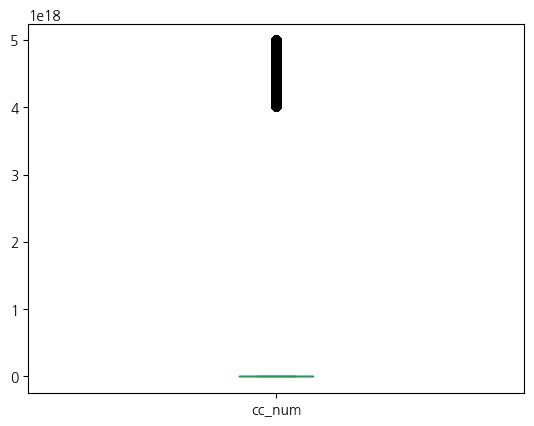


============================== amt ==============================
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


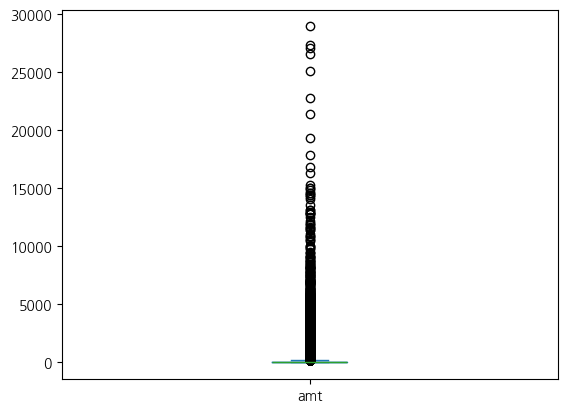


============================== lat ==============================
count    1.852394e+06
mean     3.853931e+01
std      5.071470e+00
min      2.002710e+01
25%      3.466890e+01
50%      3.935430e+01
75%      4.194040e+01
max      6.669330e+01
Name: lat, dtype: float64


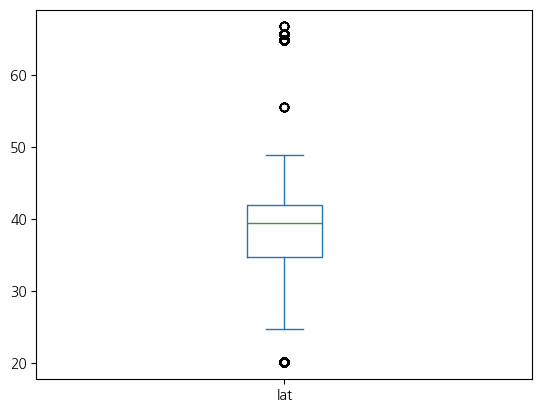


============================== long ==============================
count    1.852394e+06
mean    -9.022783e+01
std      1.374789e+01
min     -1.656723e+02
25%     -9.679800e+01
50%     -8.747690e+01
75%     -8.015800e+01
max     -6.795030e+01
Name: long, dtype: float64


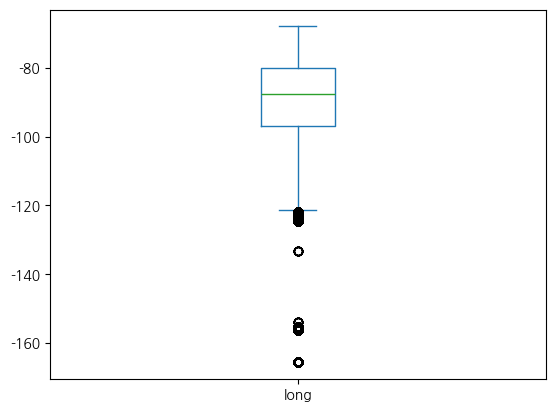


============================== city_pop ==============================
count    1.852394e+06
mean     8.864367e+04
std      3.014876e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.443000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64


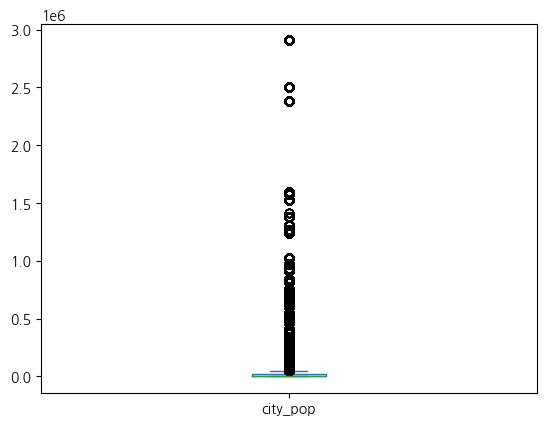


============================== merch_lat ==============================
count    1.852394e+06
mean     3.853898e+01
std      5.105604e+00
min      1.902742e+01
25%      3.474012e+01
50%      3.936890e+01
75%      4.195626e+01
max      6.751027e+01
Name: merch_lat, dtype: float64


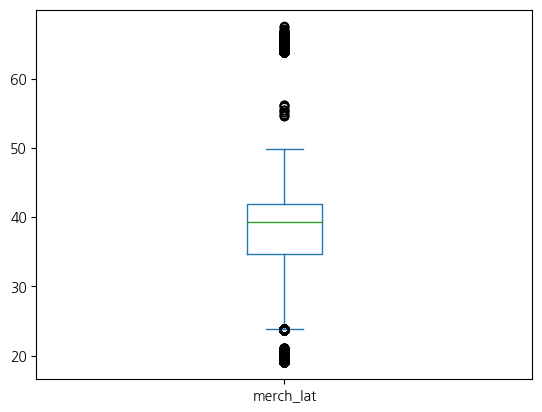


============================== merch_long ==============================
count    1.852394e+06
mean    -9.022794e+01
std      1.375969e+01
min     -1.666716e+02
25%     -9.689944e+01
50%     -8.744069e+01
75%     -8.024511e+01
max     -6.695090e+01
Name: merch_long, dtype: float64


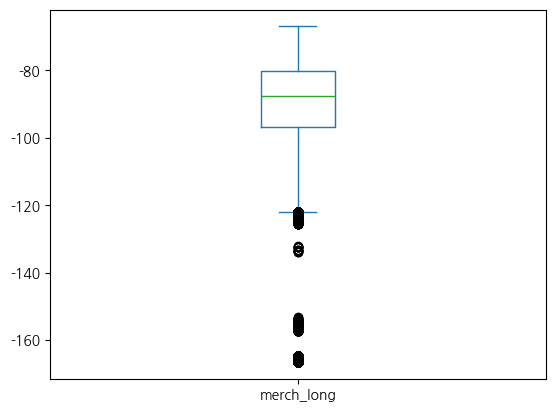


============================== is_fraud ==============================
count    1.852394e+06
mean     5.210015e-03
std      7.199217e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64


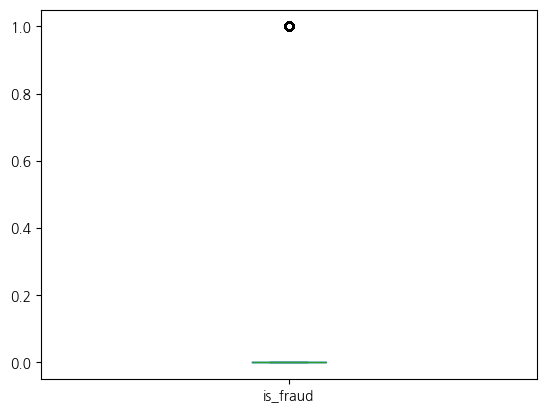

In [192]:
# 이상치가 존재하는 컬럼들의 수염박스 그래프 확인
for col in outlier_col:
    print('='*30, col, '='*30)
    print(data[col].describe())
    data[col].plot(kind='box')
    plt.show()
    print()

In [193]:
# 위도 경도 이상치 존재하는지 확인
# 지구 상에 존재할 수 있는 위도/경도 넘어서면 이상치로 판단

# 위도 : -90~90
print('lat 컬럼의 이상치 :',len(data[(data['lat'] > 90) | (data['lat'] < -90)]))
print('merch_lat 컬럼의 이상치 :',len(data[(data['merch_lat'] > 90) | (data['merch_lat'] < -90)]))

# 경도 : -180~180 
print('long 컬럼의 이상치 :',len(data[(data['long'] > 180) | (data['long'] < -180)]))
print('merch_long 컬럼의 이상치 :',len(data[(data['merch_long'] > 180) | (data['merch_long'] < -180)]))

# 이상치가 존재하지 않는다 -> 전세계에 존재하므로 가능

lat 컬럼의 이상치 : 0
merch_lat 컬럼의 이상치 : 0
long 컬럼의 이상치 : 0
merch_long 컬럼의 이상치 : 0


### 이상치가 없는 것으로 판단
- cc_num : 카드번호(식별자) -> 이상치X
- amt : 거래금액 -> 분포가 적당(이상치X)
- lat : 고객 거주지 위도 -> 이상치X
- long : 고객 거주지 경도 -> 이상치X
- merch_lat : 고객 거주지 위도 -> 이상치X
- merch_long : 고객 거주지 경도 -> 이상치X
- city_pop : 인구수(대도시,중소도시 등 인구 고려) -> 이상치X
- is_fraud : 이진분류 데이터(0/1) -> 이상치X


# 3. EDA(탐색적 데이터 분석)

## 컬럼 확인
- trans_date_trans_time : 거래날짜/시간(날짜 형식)
- cc_num : 카드 번호. 고유값(id처럼 활용 가능)
- merchant : 결제매장명(거래 상점)
- category : 결제매장 분류(거래 상점 범주)
- amt : 거래금액
- first : first_name(고객 이름)
- last : last_name(고객 성)
- gender : 성별(F/M)
- street : 고객 거주지 정보
- city : 고객 거주지 정보 City
- state : 고객 거주지 정보 주
- zip : 고객 거주지 정보 우편번호
- lat : 고객 거주지 정보 위도
- long : 고객 거주지 정보경도
- city_pop : 고객 거주지의 도시의 인구 수
- job : 고객 직업
- dob : 고객 생년월일
- trans_num : 거래번호
- unix_time : 거래시점 (유닉스 타임스탬프)
- merch_lat : 고객 거주지  위도
- merch_long : 고객 거주지  경도
- is_fraud : 사기여부(0/1) = 종속변수(target)


In [194]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [195]:
# 톧계 요약(범주형 데이터 포함)
data.describe(include='all')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1852394,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,...,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1852394,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,1819551,NaN,693,14,NaN,355,486,2,999,906,...,NaN,NaN,NaN,497,984,1852394,NaN,NaN,NaN,NaN
top,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,4,NaN,6262,188029,NaN,38112,40940,1014749,4392,8040,...,NaN,NaN,NaN,13898,8044,1,NaN,NaN,NaN,NaN
mean,NaN,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,...,3.853931e+01,-9.022783e+01,8.864367e+04,NaN,NaN,NaN,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,NaN,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,NaN,...,5.071470e+00,1.374789e+01,3.014876e+05,NaN,NaN,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,NaN,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.410000e+02,NaN,NaN,NaN,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,NaN,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.443000e+03,NaN,NaN,NaN,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,NaN,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00


In [196]:
# 문자형 / 숫자형으로 구분
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude='object')

In [197]:
# 문자형 데이터 value_counts() 확인

important_cols = []
for col in data_obj:
#     print(col)
    print('='*30, col, '='*30)
    print(f'{col}의 unique의 수 = {data_obj[col].nunique()}')
    print()
    
    print(f"{col}의 value_counts")
    print(data_obj[col].value_counts())
    print()
    
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False))
    ratio_result = data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False)
    important_cols.append(ratio_result[ratio_result['is_fraud'] > 0.4].index)
    print()

============================== trans_date_trans_time ==============================
trans_date_trans_time의 unique의 수 = 1819551

trans_date_trans_time의 value_counts
trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2020-10-05 19:37:49    4
2020-12-13 17:53:47    4
                      ..
2019-01-01 00:41:45    1
2019-01-01 00:42:26    1
2019-01-01 00:43:38    1
2019-01-01 00:44:20    1
2020-12-31 23:50:17    1
Name: count, Length: 1819551, dtype: int64

                       is_fraud
trans_date_trans_time          
2019-09-11 22:58:11         1.0
2019-12-22 01:09:30         1.0
2019-02-12 23:49:17         1.0
2019-09-23 06:33:47         1.0
2019-05-03 04:38:52         1.0
...                         ...
2019-01-01 00:41:45         0.0
2019-01-01 00:42:26         0.0
2019-01-01 00:43:38         0.0
2019-01-01 00:44:20         0.0
2020-12-31 23:50:17         0.0

[1819551 rows x 1 columns]

============================== merchant ==========


============================== job ==============================
job의 unique의 수 = 497

job의 value_counts
job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: count, Length: 497, dtype: int64

                          is_fraud
job                               
Accountant, chartered     1.000000
Warehouse manager         1.000000
Careers adviser           1.000000
Solicitor                 1.000000
Ship broker               1.000000
...                            ...
Health physicist          0.000686
Contractor                0.000458
Engineer, communications  0.000000
Engineer, drilling        0.000000
Stage manager             0.00000

============================== cc_num ==============================
cc_num의 기초 통계량 = count    1.852394e+06
mean     4.173860e+17
std      1.309115e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521417e+15
75%      4.642255e+15
max      4.992346e+18
Name: cc_num, dtype: float64



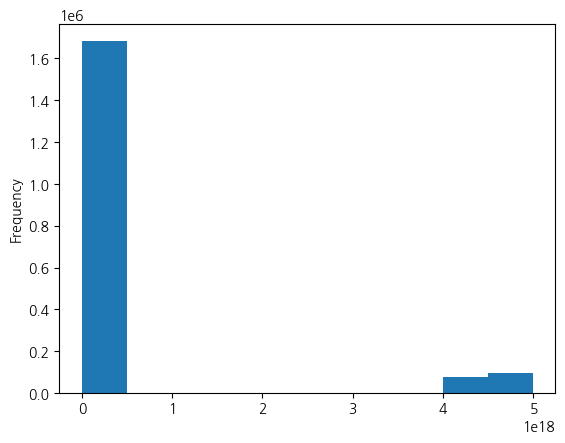


                     is_fraud
cc_num                       
501818133297              1.0
501894933032              1.0
2295963260374698          1.0
2242176657877538          1.0
6011935564104173          1.0
...                       ...
3583293909206278          0.0
375248307838179           0.0
3583635130604947          0.0
4810839835482794272       0.0
4584931703207308232       0.0

[999 rows x 1 columns]

============================== amt ==============================
amt의 기초 통계량 = count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64



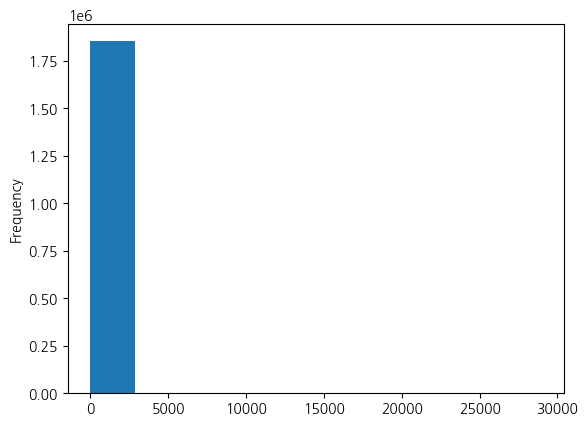


          is_fraud
amt               
281.28         1.0
984.69         1.0
984.59         1.0
684.27         1.0
277.20         1.0
...            ...
25086.94       0.0
26544.12       0.0
27119.77       0.0
27390.12       0.0
11960.97       0.0

[60616 rows x 1 columns]

============================== zip ==============================
zip의 기초 통계량 = count    1.852394e+06
mean     4.881326e+04
std      2.688185e+04
min      1.257000e+03
25%      2.623700e+04
50%      4.817400e+04
75%      7.204200e+04
max      9.992100e+04
Name: zip, dtype: float64



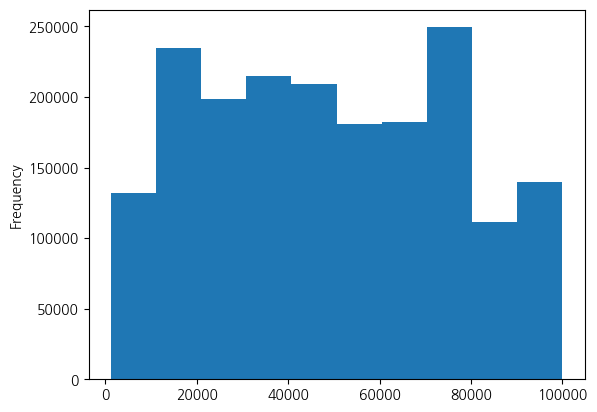


       is_fraud
zip            
4032        1.0
99921       1.0
68375       1.0
67346       1.0
63966       1.0
...         ...
79413       0.0
39113       0.0
19149       0.0
87117       0.0
15217       0.0

[985 rows x 1 columns]

============================== lat ==============================
lat의 기초 통계량 = count    1.852394e+06
mean     3.853931e+01
std      5.071470e+00
min      2.002710e+01
25%      3.466890e+01
50%      3.935430e+01
75%      4.194040e+01
max      6.669330e+01
Name: lat, dtype: float64



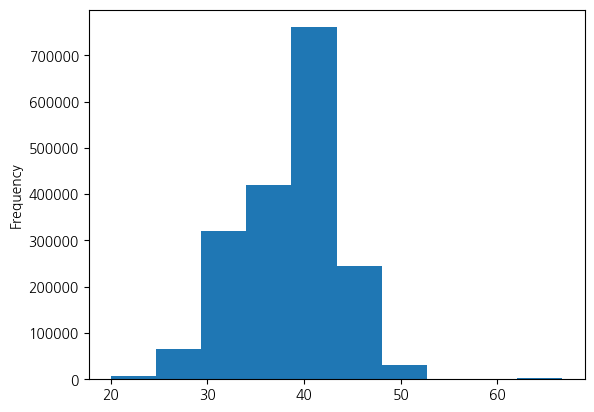


         is_fraud
lat              
27.8942       1.0
66.6933       1.0
29.4400       1.0
55.4732       1.0
48.0379       1.0
...           ...
42.9782       0.0
31.3833       0.0
40.0369       0.0
38.8564       0.0
31.4647       0.0

[983 rows x 1 columns]

============================== long ==============================
long의 기초 통계량 = count    1.852394e+06
mean    -9.022783e+01
std      1.374789e+01
min     -1.656723e+02
25%     -9.679800e+01
50%     -8.747690e+01
75%     -8.015800e+01
max     -6.795030e+01
Name: long, dtype: float64



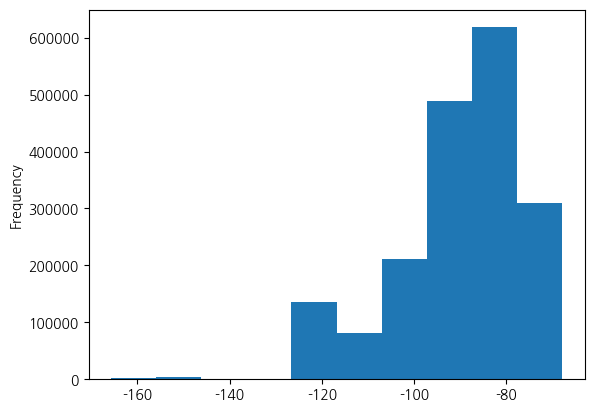


           is_fraud
long               
-133.1171       1.0
-122.2750       1.0
-122.3022       1.0
-122.4477       1.0
-81.8140        1.0
...             ...
-106.5503       0.0
-88.0434        0.0
-85.4834        0.0
-111.9027       0.0
-111.1439       0.0

[983 rows x 1 columns]

============================== city_pop ==============================
city_pop의 기초 통계량 = count    1.852394e+06
mean     8.864367e+04
std      3.014876e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.443000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64



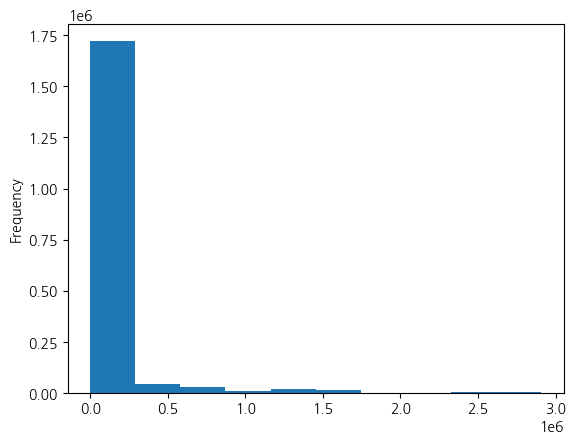


          is_fraud
city_pop          
296965         1.0
242803         1.0
198659         1.0
28506          1.0
121            1.0
...            ...
595            0.0
376            0.0
103927         0.0
310            0.0
43             0.0

[891 rows x 1 columns]

============================== unix_time ==============================
unix_time의 기초 통계량 = count    1.852394e+06
mean     1.358674e+09
std      1.819508e+07
min      1.325376e+09
25%      1.343017e+09
50%      1.357089e+09
75%      1.374581e+09
max      1.388534e+09
Name: unix_time, dtype: float64



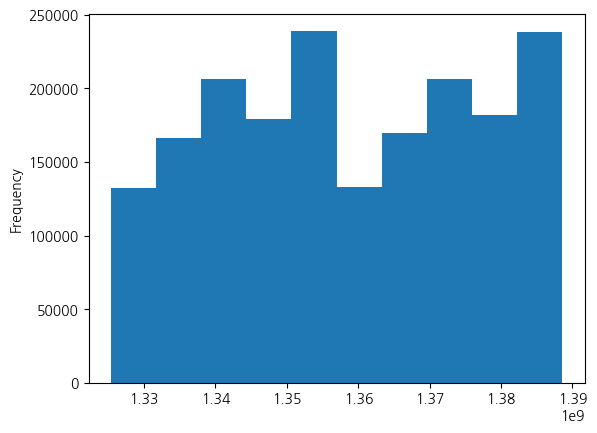


            is_fraud
unix_time           
1341538357       1.0
1344862776       1.0
1329090557       1.0
1354665315       1.0
1350857340       1.0
...              ...
1325378505       0.0
1325378546       0.0
1325378618       0.0
1325378660       0.0
1388533817       0.0

[1819583 rows x 1 columns]

============================== merch_lat ==============================
merch_lat의 기초 통계량 = count    1.852394e+06
mean     3.853898e+01
std      5.105604e+00
min      1.902742e+01
25%      3.474012e+01
50%      3.936890e+01
75%      4.195626e+01
max      6.751027e+01
Name: merch_lat, dtype: float64



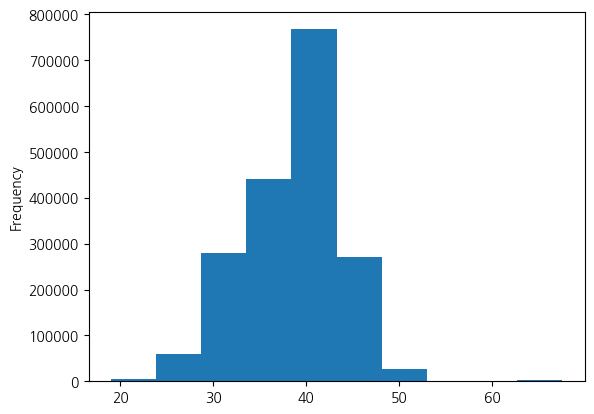


           is_fraud
merch_lat          
34.739887       1.0
67.510267       1.0
38.449115       1.0
35.672329       1.0
31.799209       1.0
...             ...
19.054867       0.0
19.054924       0.0
19.056832       0.0
19.056869       0.0
66.610031       0.0

[1754157 rows x 1 columns]

============================== merch_long ==============================
merch_long의 기초 통계량 = count    1.852394e+06
mean    -9.022794e+01
std      1.375969e+01
min     -1.666716e+02
25%     -9.689944e+01
50%     -8.744069e+01
75%     -8.024511e+01
max     -6.695090e+01
Name: merch_long, dtype: float64



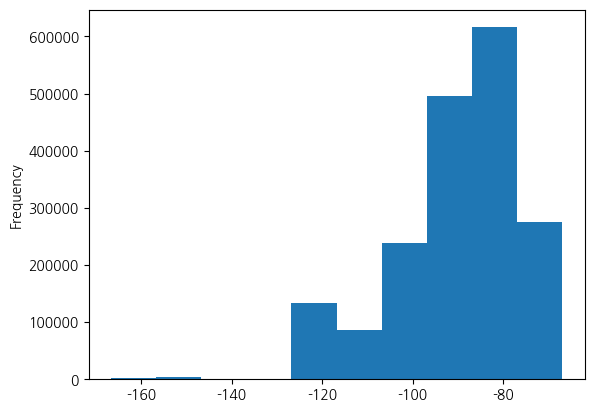


             is_fraud
merch_long           
-95.687871        1.0
-89.176591        1.0
-103.432490       1.0
-87.651246        1.0
-97.675129        1.0
...               ...
-166.628475       0.0
-166.628201       0.0
-166.627418       0.0
-166.627073       0.0
-166.653605       0.0

[1809753 rows x 1 columns]



In [198]:
# 숫자형 데이터 확인 + 그래프

for col in data_num.iloc[:, :-1]:
#     print(col)
    print('='*30, col, '='*30)
    print(f'{col}의 기초 통계량 = {data_num[col].describe()}')
    print()
    
    data_num[col].plot(kind='hist')
    plt.show()
    print()
    
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False))
    ratio_result = data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False)
    important_cols.append(ratio_result[ratio_result['is_fraud'] > 0.4].index)
    print()

In [199]:
# 전체 컬럼 중 중요 인덱스 확인
important_cols

[Index(['2019-09-11 22:58:11', '2019-12-22 01:09:30', '2019-02-12 23:49:17',
        '2019-09-23 06:33:47', '2019-05-03 04:38:52', '2019-07-06 01:46:25',
        '2019-08-12 03:30:30', '2019-04-08 22:03:13', '2019-07-13 22:03:01',
        '2019-05-12 23:31:24',
        ...
        '2020-04-21 23:51:06', '2020-02-04 00:04:20', '2020-11-26 13:03:12',
        '2020-02-10 22:13:42', '2020-06-07 01:07:29', '2020-10-15 22:55:52',
        '2020-09-27 23:51:18', '2020-10-27 20:29:57', '2020-12-08 22:16:31',
        '2020-02-08 05:55:26'],
       dtype='object', name='trans_date_trans_time', length=9637),
 Index([], dtype='object', name='merchant'),
 Index([], dtype='object', name='category'),
 Index(['Calvin', 'Samantha', 'Cameron', 'Nicole', 'Molly', 'Phyllis', 'Bruce',
        'Ashlee', 'Austin', 'Angelica', 'Arthur', 'Evan', 'Deanna', 'Traci',
        'Dennis', 'Colleen', 'Chelsea', 'Meagan'],
       dtype='object', name='first'),
 Index(['Schaefer', 'Santiago', 'Golden', 'Wells', 'Bartlett

In [215]:
# 1개 이상인 경우만 확인
final_col = []
for col in important_cols:
#     print(col)
    if len(col) > 0:
        print(col.name, len(col))
        final_col.append(col.name)
# final_col

trans_date_trans_time 9637
first 18
last 21
street 91
city 70
state 1
job 22
dob 90
trans_num 9651
cc_num 91
amt 5800
zip 88
lat 88
long 87
city_pop 69
unix_time 9637
merch_lat 9588
merch_long 9636


In [201]:
len(final_col)

18

# 4.변수 데이터타입, 서열변수, 카테고리변수 처리
- 변수 선택, 파생변수 생성

False
2


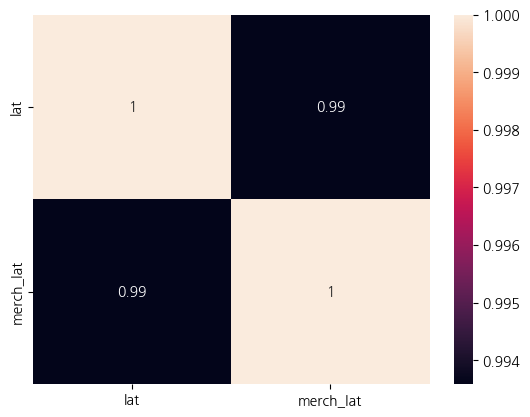

In [202]:
print((data['lat'] == data['merch_lat']).all())
print((data['lat'] == data['merch_lat']).sum())

corr = data[['lat', 'merch_lat']].corr()
sns.heatmap(corr, annot=True)
plt.show()

False
1


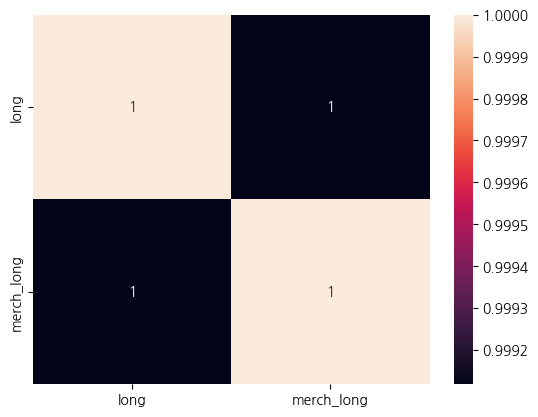

In [203]:
print((data['long'] == data['merch_long']).all())
print((data['long'] == data['merch_long']).sum())

corr = data[['long', 'merch_long']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [205]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [206]:
# 고객의 주소는 street, city, state, zip까지 하나의 컬럼으로 생성
# zip을 int에서 str로 변환
data['zip'] = data['zip'].astype(str)

# street,city,state zip으로 구성
data['address'] = (data['street'] + ', ' + data['city']  + ', '  + data['state']  + ',' + data['zip'])

In [207]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,address
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,"561 Perry Cove, Moravian Falls, NC,28654"
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,"43039 Riley Greens Suite 393, Orient, WA,99160"
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,"594 White Dale Suite 530, Malad City, ID,83252"
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,"9443 Cynthia Court Apt. 038, Boulder, MT,59632"
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,"408 Bradley Rest, Doe Hill, VA,24433"


In [208]:
data = data.drop(['street','city','state','zip'], axis=1)

In [218]:
# unique값의 수 확인 -> street의 unique 수와 동일
print('address의 unique의 수 =', data['address'].nunique())
print()

# value_counts 값 확인
print(f"address의 value_counts")
print(data['address'].value_counts())

# 0.4 이상 영향을 주는 행이 존재하는지 확인
print(data[['address', 'is_fraud']].groupby('address').mean().sort_values(by='is_fraud', ascending=False))
ratio_result = data[['address', 'is_fraud']].groupby('address').mean().sort_values(by='is_fraud', ascending=False)
len(ratio_result[ratio_result['is_fraud'] > 0.4])

# final_col에 추가
final_col.append('address')

address의 unique의 수 = 999

address의 value_counts
address
444 Robert Mews, Clarks Mills, PA,16114                     4392
908 Brooks Brook, Lomax, IL,61454                           4392
320 Nicholson Orchard, Thompson, UT,84540                   4386
5796 Lee Coves Apt. 286, Walnut Ridge, AR,72476             4386
03512 Jackson Ports, Reno, NV,89512                         4386
                                                            ... 
610 Pacheco Parkway, Falls Church, VA,22046                    7
9599 Washington Field Suite 238, New York City, NY,10018       7
3437 Ross Flat Apt. 592, Norfolk, VA,23523                     7
5124 Wendy Skyway Suite 154, Karns City, PA,16041              7
007 Tonya Isle Suite 299, Wever, IA,52658                      6
Name: count, Length: 999, dtype: int64
                                                    is_fraud
address                                                     
007 Tonya Isle Suite 299, Wever, IA,52658                1.0
01770 K

In [220]:
for col in final_col:
    print(col)

trans_date_trans_time
first
last
street
city
state
job
dob
trans_num
cc_num
amt
zip
lat
long
city_pop
unix_time
merch_lat
merch_long
address


In [226]:
# 제거한 컬럼을 없애기
remove = ['street', 'city', 'state', 'zip']
for col in remove:
    if col in final_col:
        final_col.remove(col)
final_col

['trans_date_trans_time',
 'first',
 'last',
 'job',
 'dob',
 'trans_num',
 'cc_num',
 'amt',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'address']

In [232]:
data_sets = data[final_col]
data_sets.head()

,trans_date_trans_time,first,last,job,dob,trans_num,cc_num,amt,city_pop,unix_time,merch_lat,merch_long,address
0,2019-01-01 00:00:18,Jennifer,Banks,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2703186189652095,4.97,3495,1325376018,36.011293,-82.048315,"561 Perry Cove, Moravian Falls, NC,28654"
1,2019-01-01 00:00:44,Stephanie,Gill,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,630423337322,107.23,149,1325376044,49.159047,-118.186462,"43039 Riley Greens Suite 393, Orient, WA,99160"
2,2019-01-01 00:00:51,Edward,Sanchez,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,38859492057661,220.11,4154,1325376051,43.150704,-112.154481,"594 White Dale Suite 530, Malad City, ID,83252"
3,2019-01-01 00:01:16,Jeremy,White,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,3534093764340240,45.00,1939,1325376076,47.034331,-112.561071,"9443 Cynthia Court Apt. 038, Boulder, MT,59632"
4,2019-01-01 00:03:06,Tyler,Garcia,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,375534208663984,41.96,99,1325376186,38.674999,-78.632459,"408 Bradley Rest, Doe Hill, VA,24433"


# 6. 홀드아웃(훈련데이터, 테스트 데이터로 분리)

In [230]:
pd.get_dummies(data_sets, drop_first=True)

MemoryError: Unable to allocate 3.07 TiB for an array with shape (1852394, 1819551) and data type bool